In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv("CoffieRoastingData.csv")
df.head()

,temperature,duration,result
0,185.317638,12.693965,1
1,259.920475,11.867664,0
2,231.013571,14.414242,0
3,175.366645,11.720587,0
4,187.120865,14.129732,1


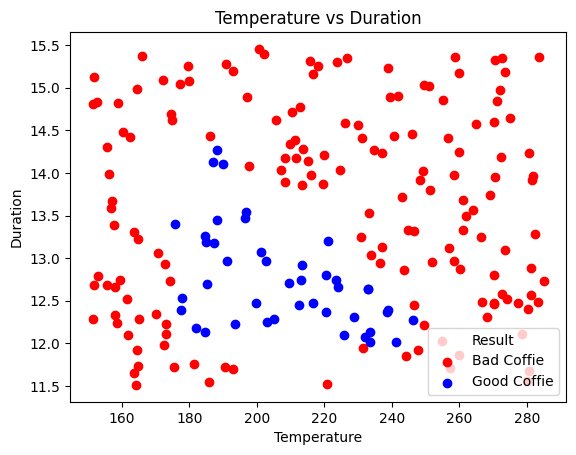

In [3]:
# Separate points based on result
df_0 = df[df["result"] == 0]
df_1 = df[df["result"] == 1]

# Plot the scatter plot
plt.scatter(df_0["temperature"], df_0["duration"], color='red', label="Bad Coffie")
plt.scatter(df_1["temperature"], df_1["duration"], color='blue', label="Good Coffie")

# Labels and title
plt.xlabel("Temperature")
plt.ylabel("Duration")
plt.title("Temperature vs Duration")
plt.legend(title="Result")

# Show plot
plt.show()

In [4]:
X = np.array(df[["temperature","duration"]])
y = np.array(df["result"])


In [5]:
X.shape

(200, 2)

In [16]:
model = Sequential([
    tf.keras.Input(shape=(2,)),             # specifies the expected shape of the input
    Dense(units=3, activation="sigmoid",name = 'layer1'),   # creates layer 1 with 3 nodes using the sigmoid function
    Dense(units=1, activation="sigmoid",name = 'layer2')    # creates layer 2 with 1 nodes using the sigmoid function
])

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

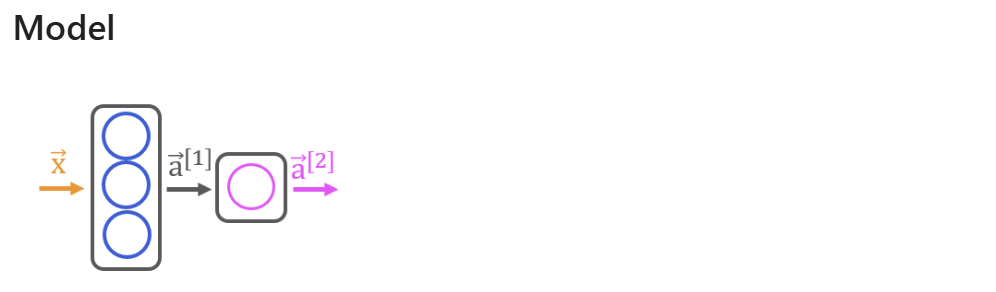
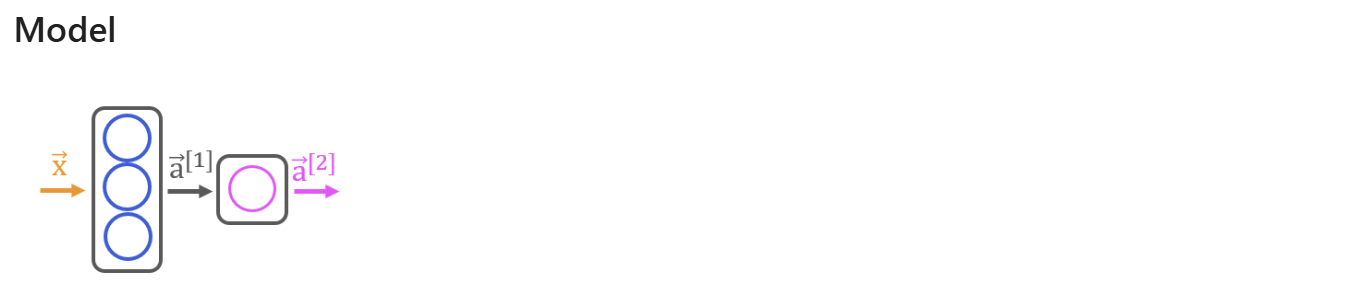

In [18]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[-0.78932154 -0.8773867   0.698473  ]
 [ 0.7527511  -0.7227241  -0.11416095]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.32028908]
 [ 1.1870104 ]
 [-0.5655534 ]] 
b2(1,): [0.]


In [19]:
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

L1 params =  9 , L2 params =  4


In [20]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")

norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)

print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [21]:
Xt = np.tile(Xn,(1000,1))
Yt = np.tile(y, (1000,))   
print(Xt.shape, Yt.shape) 

(200000, 2) (200000,)


In [22]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

In [23]:
model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 708us/step - loss: 0.2602
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 661us/step - loss: 0.1155
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 645us/step - loss: 0.0312
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 694us/step - loss: 0.0150
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 673us/step - loss: 0.0097
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 738us/step - loss: 0.0068
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.0047
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0033
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0023
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0016


In [25]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-11.060096     0.17257753  14.618457  ]
 [ -0.30447155  10.42034     12.146079  ]] 
b1: [-11.943951   12.545165    2.0157745]
W2:
 [[-55.673985]
 [ 45.69782 ]
 [-47.63797 ]] 
b2: [-14.288256]


In [50]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
predictions = 
 [[9.9984676e-01]
 [2.1226914e-09]]


In [55]:
yhat = (predictions >= 0.5).astype(int)
yhat

array([[1],
       [0]])

In [1]:
%pwd

'c:\\Users\\rahul\\Desktop\\Machine Learning\\Neural Network'